# Practice Project: Credit Card Fraud Detection
Goal: Practice dealing with imbalanced dataset and identify which classifier and determine the Classifiers we are going to use and decide which one has a higher accuracy. 

Dataset: It contains two days of transactions made by credit card in September 2013 by European cardholders. It have 492 frauds out of 284,807 transactions. It contains only numerical input variables which are the result of a PCA transformation, due confidentialty issues, the original features cannot be provided. 



# Familiarizing with the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('creditcard_transaction_records.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


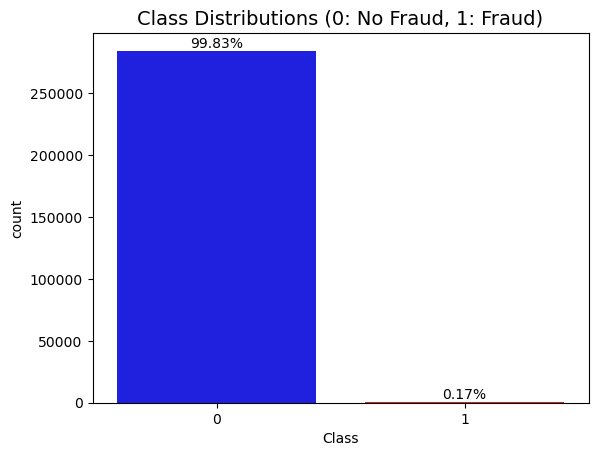

In [4]:
# Create a consist color palette for all the graphs
color = ['Blue', 'Red']

sns.countplot(x='Class', data=df, palette=color)
plt.title('Class Distributions (0: No Fraud, 1: Fraud)', fontsize=14)

# Calculate percentages
percentages = df['Class'].value_counts(normalize=True) * 100
for status, percentage in percentages.items():
    count = df['Class'].value_counts()[status]
    plt.text(status, count, f'{percentage:.2f}%', ha='center', va='bottom')


plt.show()


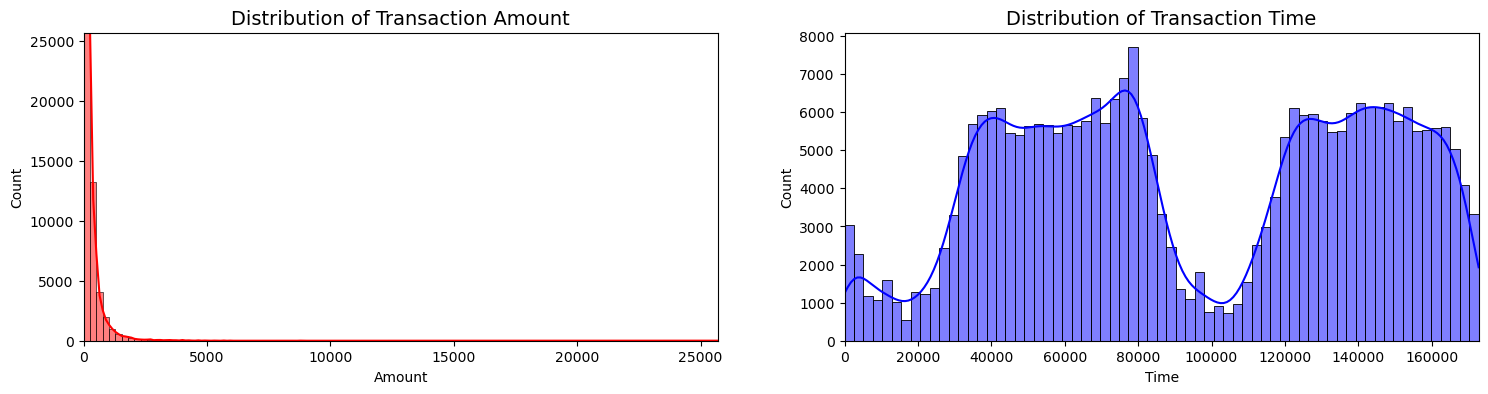

In [5]:
# plot the distribution of the Amount and Time
fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plotting the Amount with a logarithmic scale
sns.histplot(df['Amount'], ax=ax[0], color='r', kde=True, bins=100)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(df['Amount']), max(df['Amount'])])
ax[0].set_ylim([0, max(df['Amount'])])

# Plotting the Time
sns.histplot(df['Time'], ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(df['Time']), max(df['Time'])])

plt.show()


Based on the distribution, we can see that the how skewed are the transaction amount.

# Scaling
Since the dataset has already undergone PCA, the principal components are likely scaled. However, the `Time` and `Amount` columns might not be scaled. So, we need to scale these two to ensures all features contribute equally to the model. 

- Reason to use RobustScaler:<br>
$\rightarrow$ We already know that the Amount distribution is heavily skewed, so we use RobustScaler, becaues it is ideal when there are outliers in dataset, and I want to reduce their influence while still scaling the data effectively.  

In [6]:
from sklearn.preprocessing import RobustScaler  

scaler = RobustScaler()

df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['Scaled_Amount']
scaled_time = df['Scaled_Time']

df.drop(['Scaled_Amount', 'Scaled_Time'], axis=1, inplace=True)
df.insert(0, 'Scaled_Amount', scaled_amount)
df.insert(1, 'Scaled_Time', scaled_time)

df.head()

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Model Build

- Handle Class Imbalance
Fraudulant transaction are much fewer compare to non-fruadulent ones. This imbalance can lead to the model being biased toward predicting the majority class (non-fraudulent transaction)
<br>
-> Using SMOTE (Synthetic Minority Over-sampling Technique) which help balance the dataset.

In [8]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the Data 
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Perform Random Under Sampling

# Shuffle the data before creating the subsamples
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
77633,-0.137917,-0.323688,-0.360251,0.427884,0.648132,2.854582,1.418611,-0.596253,0.438390,-0.120136,...,0.423435,0.173117,0.535073,0.141119,-0.026416,-1.029679,0.076525,0.284885,0.086793,0
122479,2.763921,-0.095361,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,...,-0.156289,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,1
266982,0.225809,0.914860,-7.152384,5.911156,-6.276291,-1.352532,-3.280026,-2.280593,-2.339649,4.481106,...,0.360187,0.295787,0.513067,0.303224,0.062102,0.560750,0.150260,0.518653,0.413351,0
244004,-0.293440,0.792690,-4.673231,4.195976,-8.392423,7.743215,-1.138803,-2.094899,-3.839487,0.543053,...,-0.180279,0.554185,0.656076,0.482417,-0.624399,-0.296289,0.374802,-2.678544,0.412368,1
150687,-0.293440,0.108143,-10.300820,6.483095,-15.076363,6.554191,-8.880252,-4.471672,-14.900689,3.840170,...,0.113244,1.508748,1.041642,-0.682790,0.573544,-1.602389,-0.393521,-0.468893,0.105920,1


In [10]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


# Correlation Matrices

Negative Correlations: The lower these values, the more likely the end result may be fraud transactions. <br>
Positive Correlations: The higher these values, the more likely the end result may be fraud transactions. 

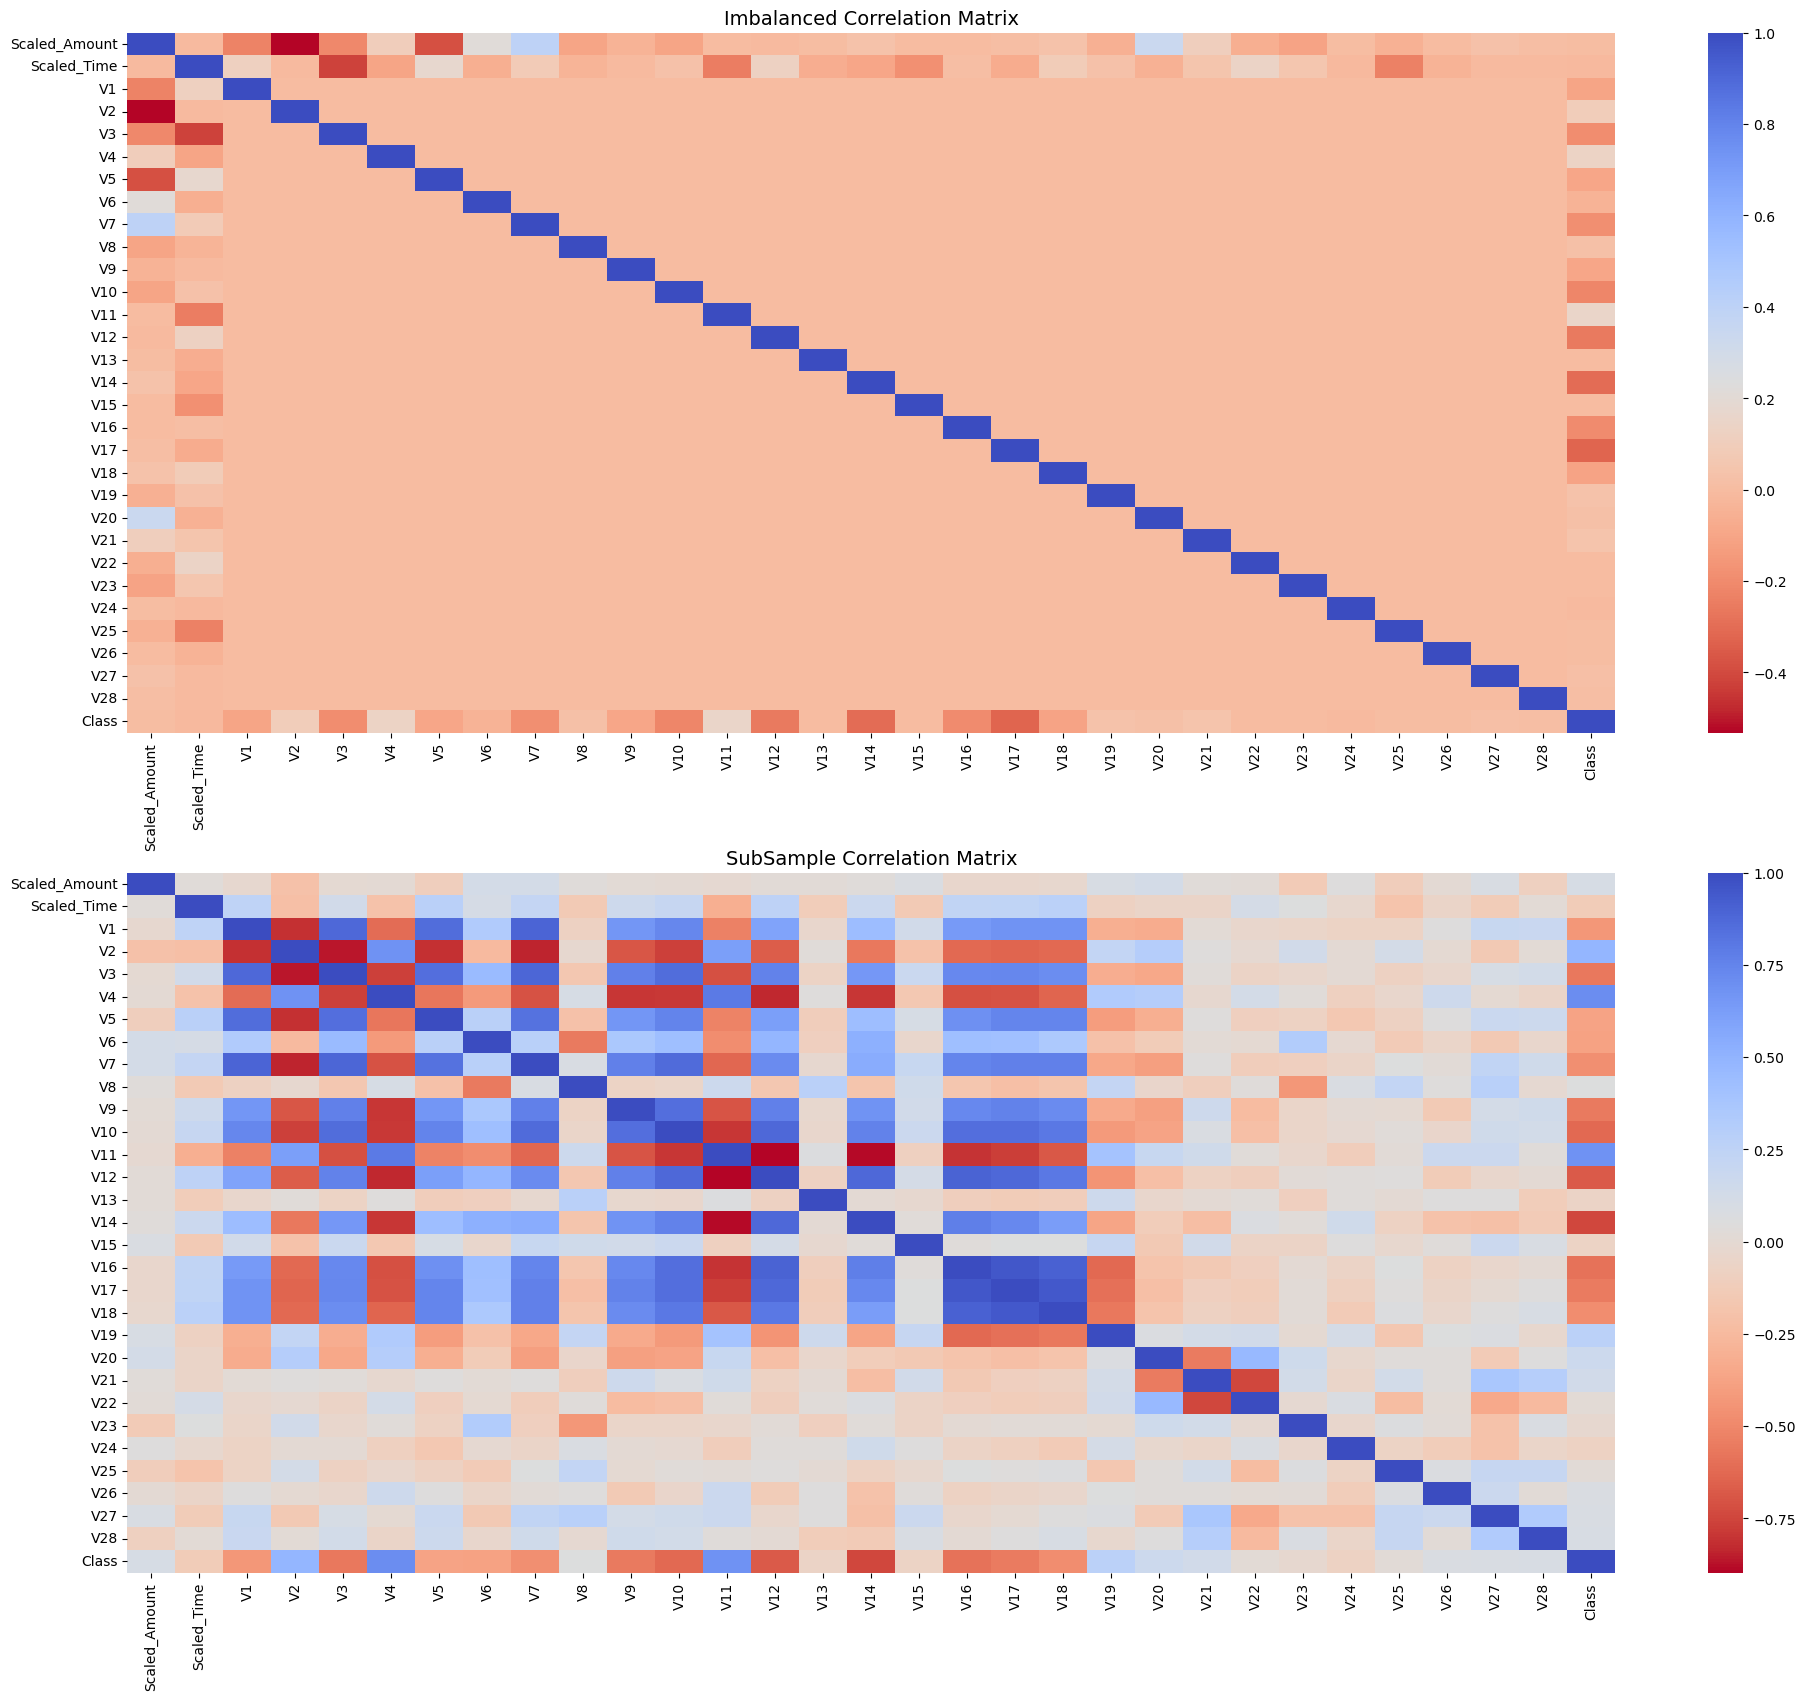

In [11]:
#plot the correlation matrices
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

Use box plots to see the negative and positive correlation with class. 

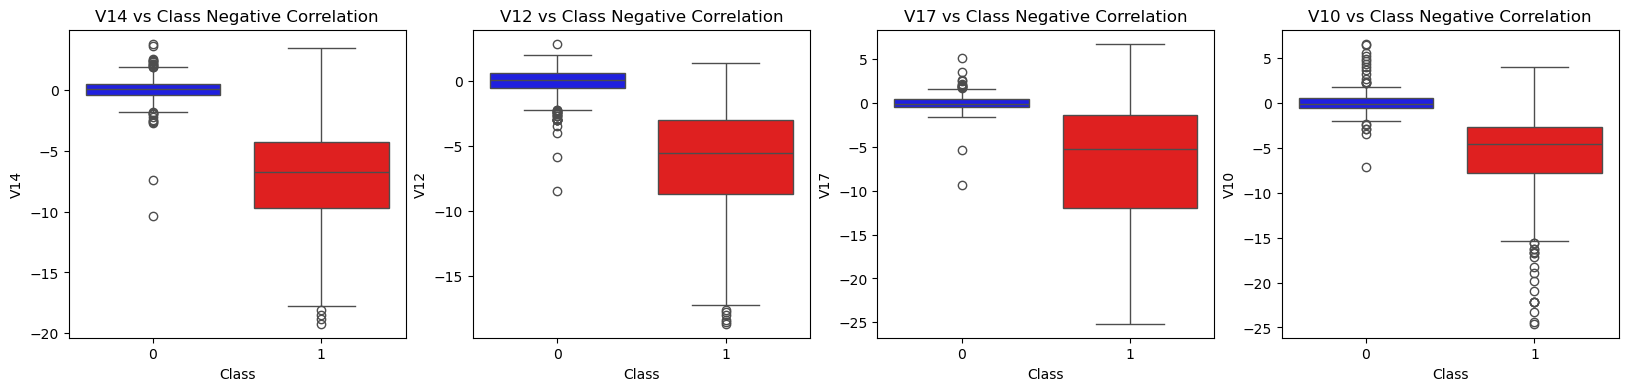

In [12]:
# Negative Correlations
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# V14 vs. Class
sns.boxplot(x='Class', y='V14', data=new_df, ax=axes[0], palette=color)
axes[0].set_title('V14 vs Class Negative Correlation')

# V12 vs. Class
sns.boxplot(x='Class', y='V12', data=new_df, ax=axes[1], palette=color)
axes[1].set_title('V12 vs Class Negative Correlation')

# V17 vs. Class
sns.boxplot(x='Class', y='V17', data=new_df, ax=axes[2], palette=color)
axes[2].set_title('V17 vs Class Negative Correlation')

# V10 vs. Class
sns.boxplot(x='Class', y='V10', data=new_df, ax=axes[3], palette=color)
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

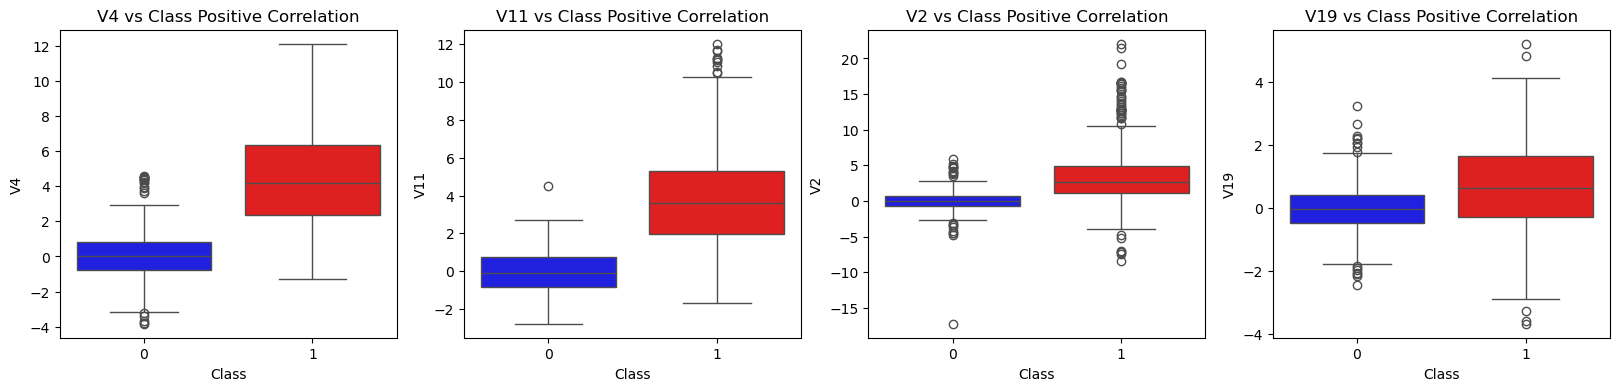

In [13]:
# Positive Correlations
fig, axes = plt.subplots(ncols=4, figsize=(20,4))

#V4 vs. Class
sns.boxplot(x='Class', y='V4', data=new_df, ax=axes[0], palette=color)
axes[0].set_title('V4 vs Class Positive Correlation')

#V11 vs. Class
sns.boxplot(x='Class', y='V11', data=new_df, ax=axes[1], palette=color)
axes[1].set_title('V11 vs Class Positive Correlation')

#V2 vs. Class
sns.boxplot(x='Class', y='V2', data=new_df, ax=axes[2], palette=color)
axes[2].set_title('V2 vs Class Positive Correlation')

#V19 vs. Class
sns.boxplot(x='Class', y='V19', data=new_df, ax=axes[3], palette=color)
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()


# Anomaly Detection

Aim to remove "Extreme Outliers" from features that have a higher correlation with our classes, which have positive impact on the accuracy of our model. 

- The Tradeoff: The lower the threshold the more outlier will be remove. However, we want to focus mroe on "extreme outlier" rather than just outliers. If we don't do that we might run the risk of information loss which will cause our models to have lower accuracy.  

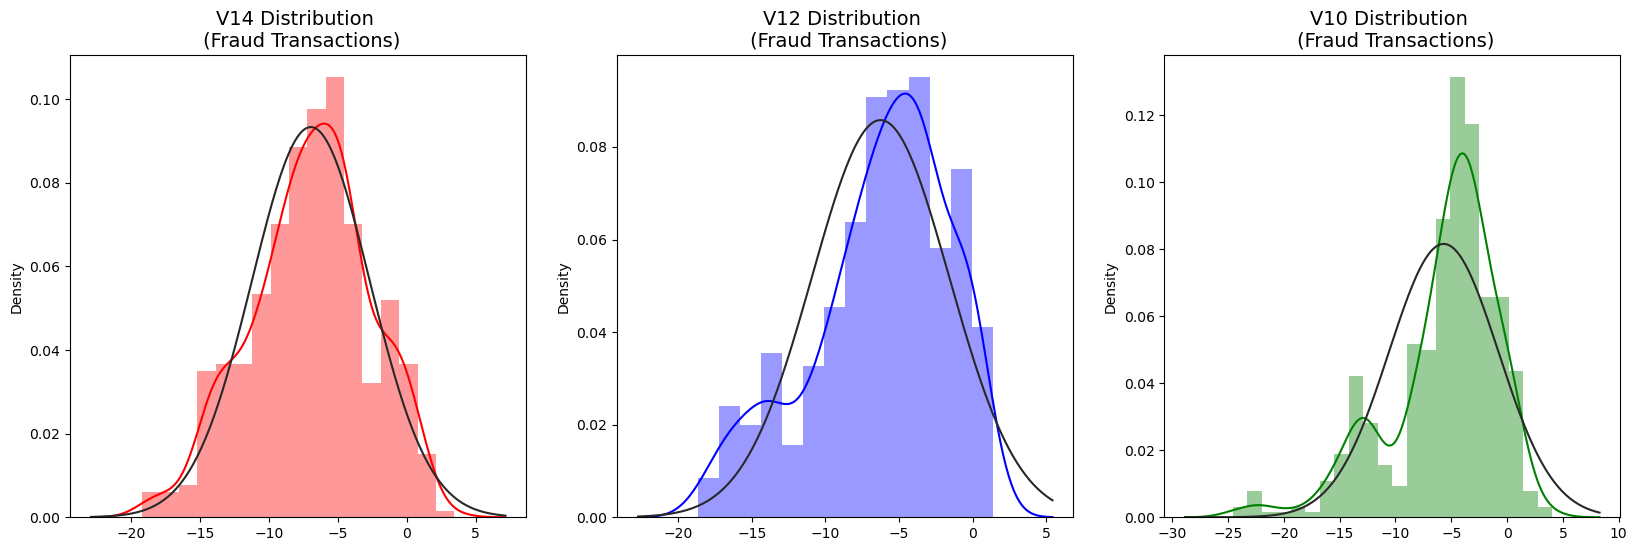

In [14]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='r')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='b')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='g')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

Only V14 achieve normal distribution compare to V12 and V10.

In [15]:
# Remove Outliers

#V14 Removing Outliers )
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
v14_iqr = q75 - q25
print(f'IQR: {v14_iqr}')

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print(f'Cut Off: {v14_cut_off} | Lower: {v14_lower} | Upper: {v14_upper}')

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print(f'Feature V14 Outliers for Fraud Casses: {len(outliers)}')
print(f'V14 outliers: {outliers}')

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
# V12 Removing Outliers
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
v12_iqr = q75 - q25
print(f'IQR: {v12_iqr}')

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print(f'Cut Off: {v12_cut_off} | Lower: {v12_lower} | Upper: {v12_upper}')

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print(f'Feature V12 Outliers for Fraud Cases: {len(outliers)}')
print(f'V12 Outliers: {outliers}')

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

# V10 Removing Outliers
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
v10_iqr = q75 - q25
print(f'IQR: {v10_iqr}')

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print(f'Cut Off: {v10_cut_off} | Lower: {v10_lower} | Upper: {v10_upper}')

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print(f'Feature V10 Outliers for Fraud Cases: {len(outliers)}')
print(f'V10 outliers: {outliers}')

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))


Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
IQR: 5.409902115485521
Cut Off: 8.114853173228282 | Lower: -17.807576138200666 | Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Casses: 4
V14 outliers: [-18.4937733551053, -18.8220867423816, -19.2143254902614, -18.0499976898594]
Number of Instances after outliers removal: 980
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
IQR: 5.780002635714835
Cut Off: 8.670003953572252 | Lower: -17.3430371579634 | Upper: 5.776973384895937
Feature V12 Outliers for Fraud Cases: 4
V12 Outliers: [-18.5536970096458, -18.0475965708216, -18.4311310279993, -18.6837146333443]
Number of Instances after outliers removal: 976
Quartile 25: -7.466658535821847 | Quartile 75: -2.5118611381562523
IQR: 4.954797397665595
Cut Off: 7.432196096498393 | Lower: -14.89885463232024 | Upper: 4.92033495834214
Feature V10 Outliers for Fraud Cases: 27
V10 outliers: [-22.1870885620007, -22.1870885620007, -16.3035376590131, -15.12375218034

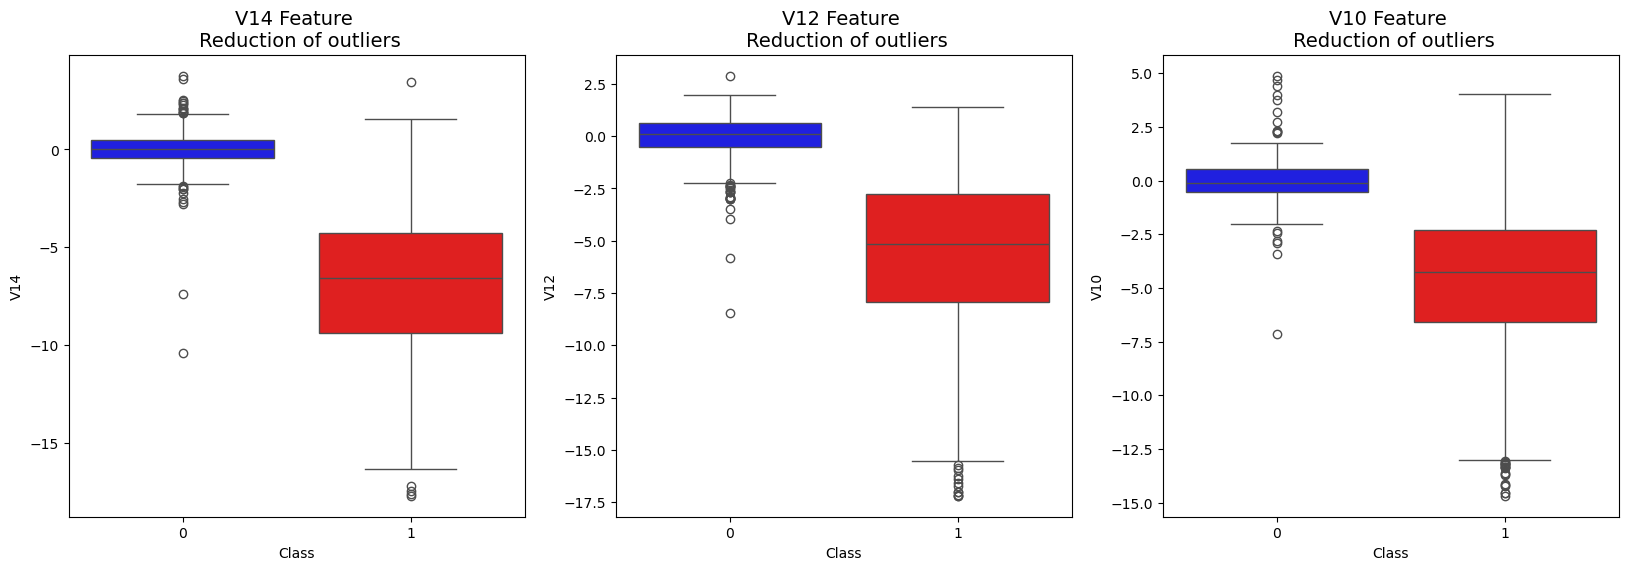

In [16]:
#plot the boxplots after removing the outliers
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

#Feature V14
sns.boxplot(x='Class', y='V14', data=new_df, ax=ax1, palette=color)
ax1.set_title('V14 Feature \n Reduction of outliers', fontsize=14)

#Feature V12
sns.boxplot(x='Class', y='V12', data=new_df, ax=ax2, palette=color)
ax2.set_title('V12 Feature \n Reduction of outliers', fontsize=14)

#Feature V10
sns.boxplot(x='Class', y='V10', data=new_df, ax=ax3, palette=color)
ax3.set_title('V10 Feature \n Reduction of outliers', fontsize=14)

plt.show()

# Dimensional Reduction

- t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud.
- Despite the small dataset, t-SNE can cluster pretty accurately in every scenerio(we shuffled the dataset)
- This give us an indication that futhur prediciton models will perform pretty well in seperating fraud case from non-fraud cases. 

In [17]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time 

#T-SNE
X = new_df.drop('Class', axis=1)
y = new_df['Class']

t0 = time.time()
X_redused_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print(f'TSNE took {t1-t0} seconds')

#PCA
t0 = time.time()
X_redused_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print(f'PCA took {t1-t0} seconds')

# TruncatedSVD
t0 = time.time()
X_redused_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print(f'Truncated SVD took {t1-t0} seconds')

  File "c:\Users\oscar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


TSNE took 5.443896770477295 seconds
PCA took 0.017577648162841797 seconds
Truncated SVD took 0.008002996444702148 seconds


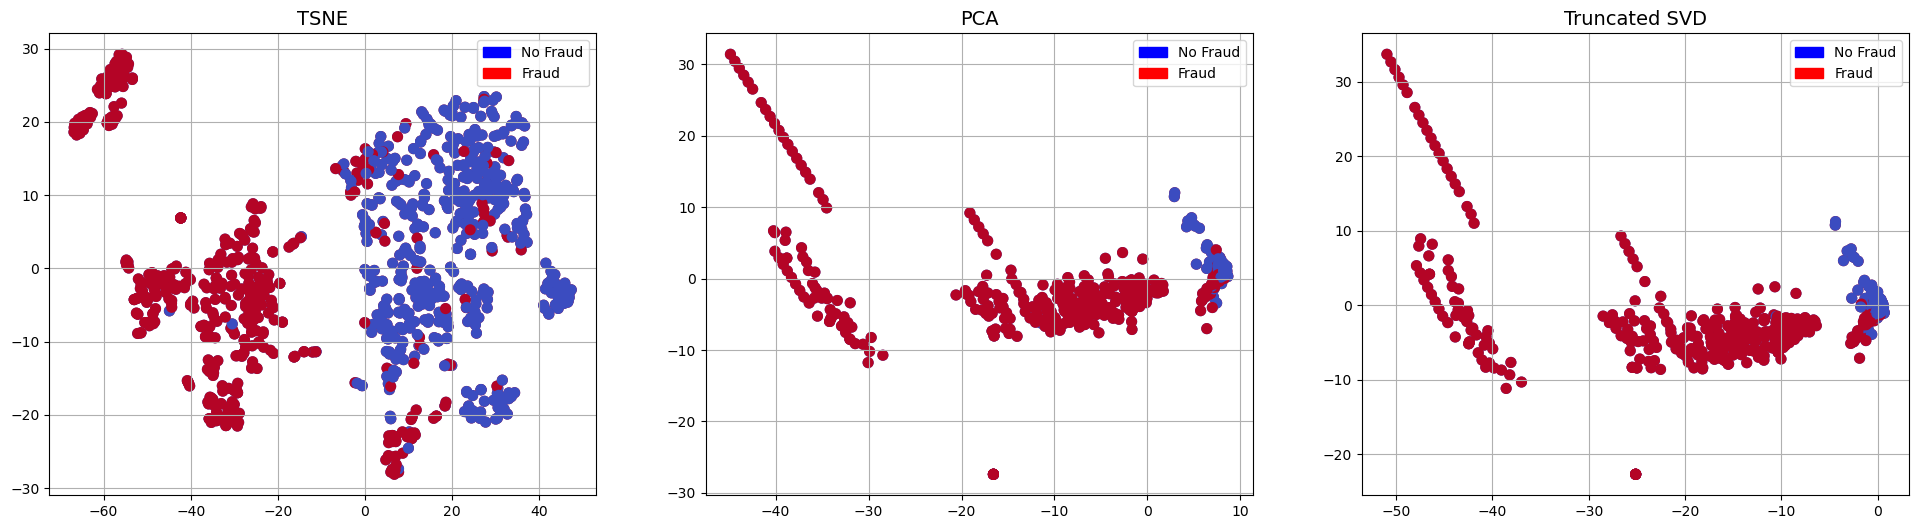

In [18]:
from matplotlib.patches import Patch
fig, ax = plt.subplots(1, 3, figsize=(24,6))

blue_patch = Patch(color='blue', label='No Fraud')
red_patch = Patch(color='red', label='Fraud')

#TSNE scatter plot
ax[0].scatter(X_redused_tsne[:,0], X_redused_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax[0].scatter(X_redused_tsne[:,0], X_redused_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax[0].set_title('TSNE', fontsize=14)
ax[0].grid(True)
ax[0].legend(handles=[blue_patch, red_patch])

#PCA scatter plot
ax[1].scatter(X_redused_pca[:,0], X_redused_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax[1].scatter(X_redused_pca[:,0], X_redused_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax[1].set_title('PCA', fontsize=14)
ax[1].grid(True)
ax[1].legend(handles=[blue_patch, red_patch])

#Truncated SVD scatter plot
ax[2].scatter(X_redused_svd[:,0], X_redused_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax[2].scatter(X_redused_svd[:,0], X_redused_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax[2].set_title('Truncated SVD', fontsize=14)
ax[2].grid(True)
ax[2].legend(handles=[blue_patch, red_patch])

plt.show()


# Classifiers (Undersampling)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Turn the values into an array for feeding the classification algorithms
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Impleming simple classifiers.
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('Classifier: ', classifier.__class__.__name__, 'Has a training score of', round(training_score.mean(),2)*100, "% accuracy score")

Classifier:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifier:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifier:  SVC Has a training score of 93.0 % accuracy score
Classifier:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


# Hyperparameter Tune

In [20]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_ # automatically apply the best parameters to the model

# K Nearest Neighbors
knears_params = {'n_neighbors': list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2,4,1)), 
              'min_samples_leaf': list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

# See the Cross Validation Score for each model
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  94.18%
Knears Neighbors Cross Validation Score 92.99%
Support Vector Classifier Cross Validation Score 94.57%
DecisionTree Classifier Cross Validation Score 93.38%


# Plot Learning Curve

- The wider the Gap between the training score and cv score, the more likely the model is overfitting (high variance)
- If the score is low in both training and cv sets this is an indication that our model is underfitting (high bias)
- Logistic Regression Classifier shows the best score in both training and cv, also seens like the lest overfitting. 
- SVC despite its initial overfitting, but improve steadily with more data.  

<module 'matplotlib.pyplot' from 'c:\\Users\\oscar\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

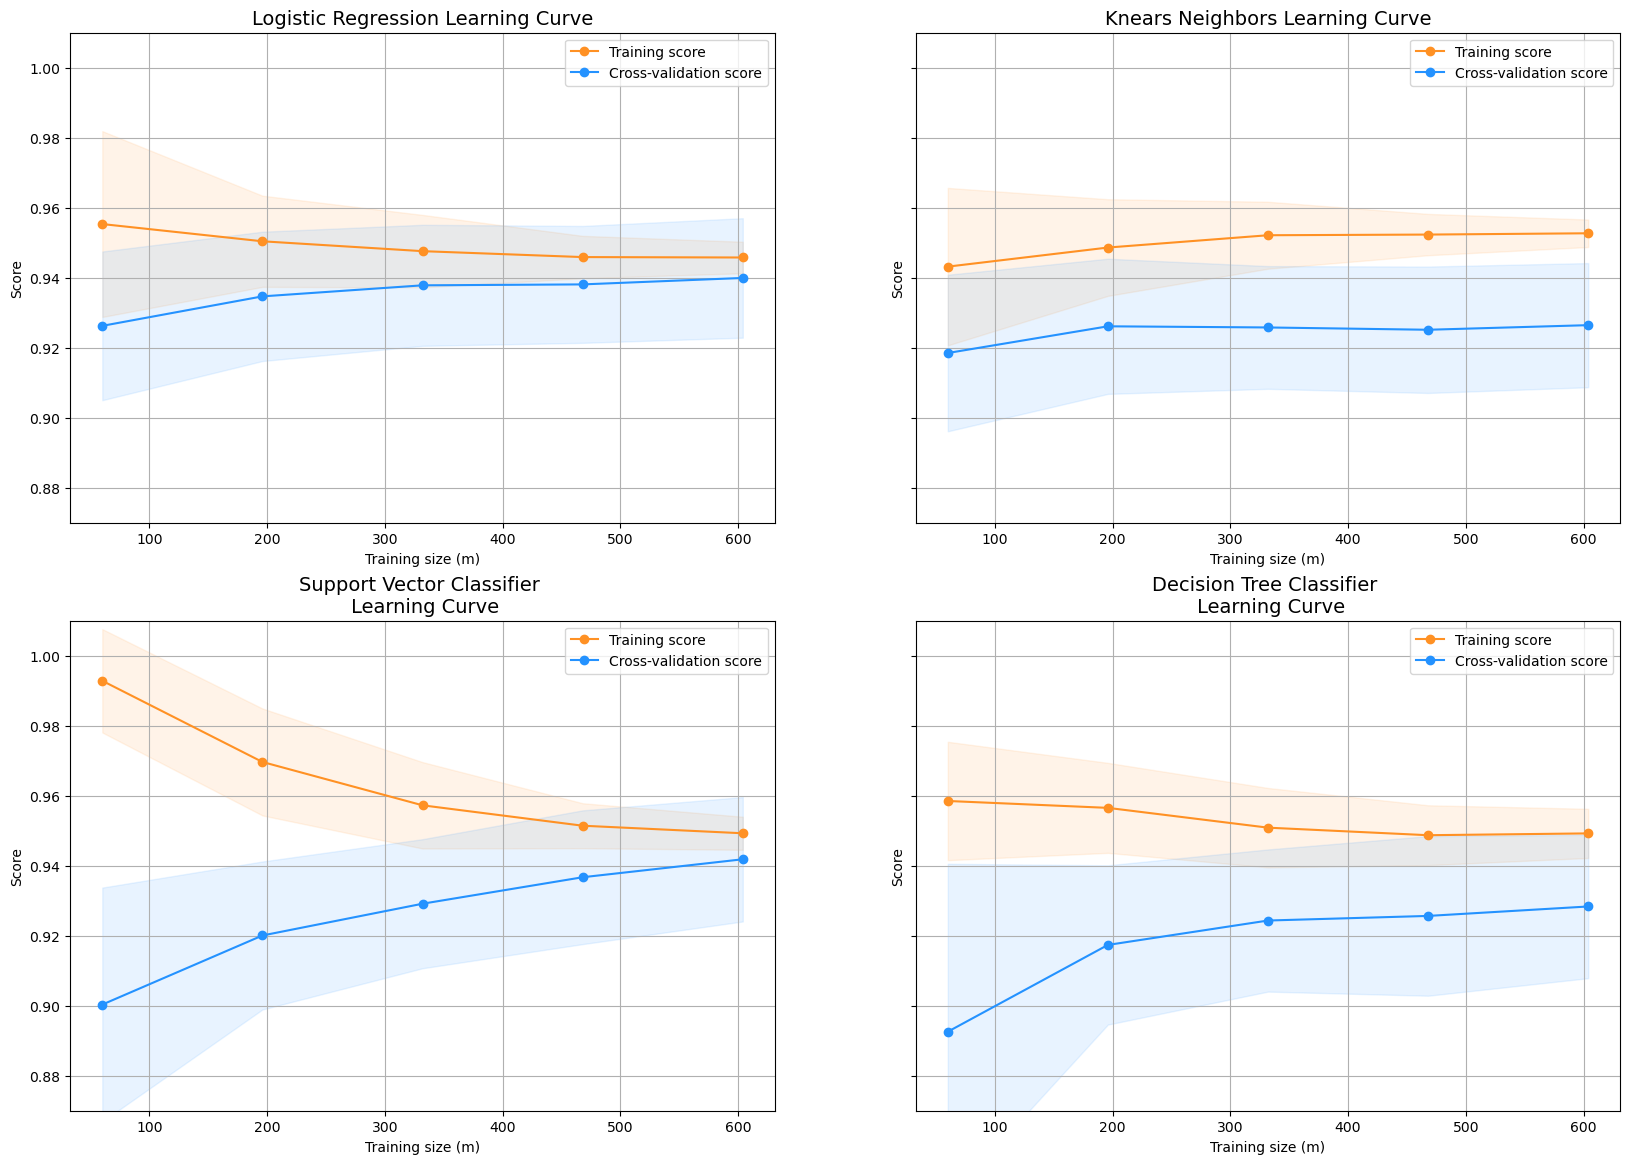

In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt


cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

# ROC Curve & AUC
Logistic Regression is the best model, reasons:<br>
- ROC Curve is the closest to the top-left corner, meaning achieving high True-Positive rate and lower False-Positive rate compare to other classifiers. 
- Logistic Regression have the highest AUC score, which indicating that he have better performance to distinguish between positive and negative compare to other classifiers. 

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

#create a dataframe with all the scors and classifiers names
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method='decision_function')
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method='decision_function')
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

print('LogisticRegression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

LogisticRegression:  0.972632596994842
KNears Neighbors:  0.9286695447409733
Support Vector Classifier:  0.9709786387082304
Decision Tree Classifier:  0.9329866562009418


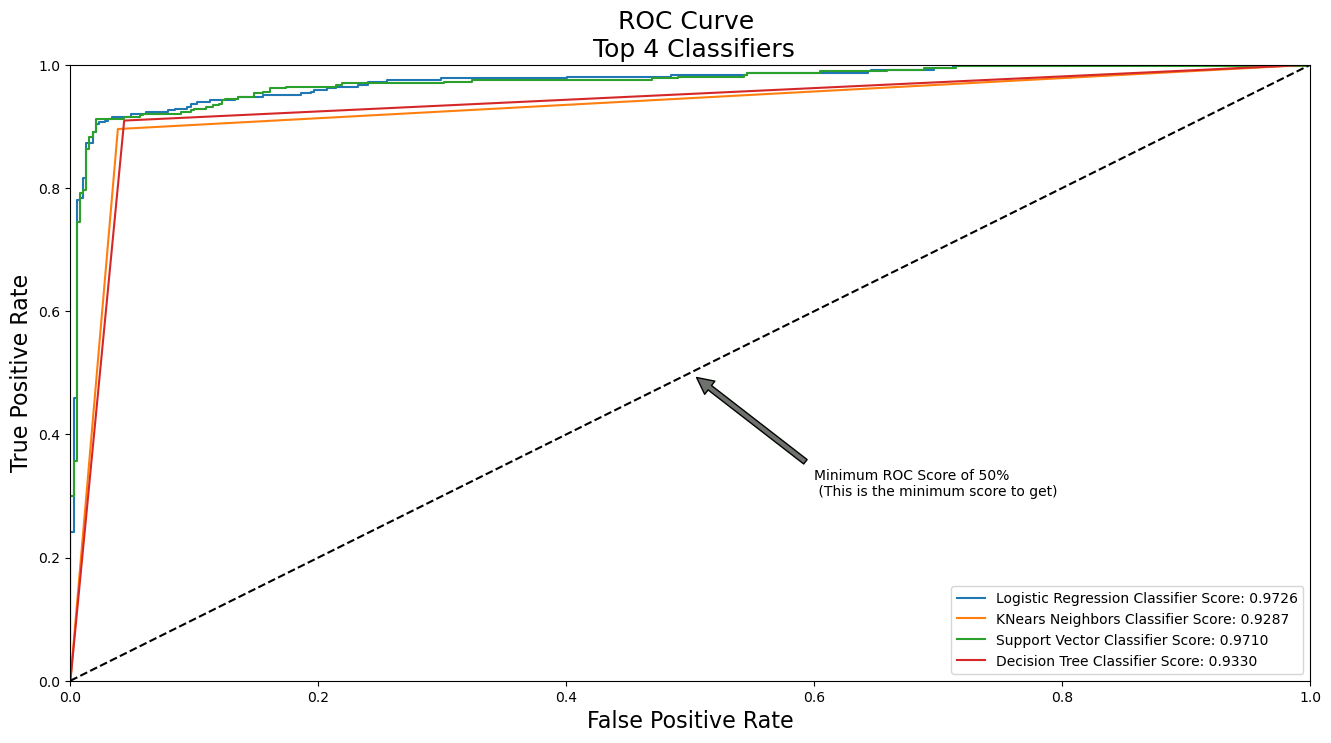

In [28]:
#plot the ROC curve
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)

##### My Note When I Learning ROC Curve and AUC
- What is the goal of this algorithm/method?
    - The goal of ROC Curve and AUC (Area Under the Curve) is to evaluate the performance of a classification model, particularly in binary classification task. These metrics help assess how well a model distinguishes between positive and negative classes, even when data may be imbalanced.
- Can I explain it in simple terms to someone else?
    - ROC Curve is like a report card that show how well a model separates positive rates against false positive across different thresholds. It plots true positive rates against false positive rates, helping us see how well the model identifies positives while avoiding false alarms. 
    - AUC is a single number summarizing the ROC Curve’s performance. A high AUC score means the model does a good job distinguishing between positive and negative cases.  

#### Note:
Minimum ROC Score of 50% is represents random guessing (AUC = 0.5). Any curve above this line indicates a model better than random guessing.

# Final Summary

## Dataset Exploration and Preprocessing
1. **Dataset Familiarization**:
   - Noticed that the `Amount` column is heavily skewed and that the dataset is already scaled except for `Amount` and `Time`.
   - Applied scaling (e.g., RobustScaler) to normalize the `Amount` and `Time` columns.

## Steps in Building the Model
1. **Handling Imbalance**:
   - Transformed the imbalanced dataset into a balanced dataset by manually concatenating the minority and majority class samples to create a symmetrical dataset.

2. **Correlation Analysis**:
   - Ran a **correlation matrix** to identify features with strong positive and negative correlations with the target variable.
   - Removed outliers using the **Interquartile Range (IQR)** method.

3. **Dimensionality Reduction**:
   - Applied three dimensionality reduction algorithms: PCA, UMAP, and t-SNE.
   - Found that **t-SNE** performed the best for visualizing the data, especially given the small dataset size.
   - This give us an indication that futhur prediciton models will perform pretty well in seperating fraud case from non-fraud cases. 

4. **Model Training and Evaluation**:
   - Tested multiple classifiers, including:
     - Logistic Regression
     - k-Nearest Neighbors
     - Support Vector Classifier
     - Decision Tree Classifier
   - Conducted **hyperparameter tuning** for each model to improve performance.
   - Plotted **learning curves** to assess model behavior (e.g., overfitting or underfitting).
   - Plotted **ROC curves** to compare models’ true positive rates and false positive rates.

5. **Model Selection**:
   - Chose **Logistic Regression** as the best-performing model based on the following:
     - Best ROC-AUC score (0.9726)
     - Strong balance of precision, recall, and F1-score.
     - Simplicity, interpretability, and computational efficiency compared to SVC.

## Conclusion
- The dataset was successfully transformed from an imbalanced to a balanced state for modeling.
- Logistic Regression proved to be the most suitable model for fraud detection, offering strong performance metrics and robustness.

## What I'd Learned 
- Dealing with imbalanced dataset 
- Use Learning Curve to identify overfitting or underfitting.

--------------------